📥 Loading Data...
✂️ Splitting data (80/20)...
⚙️ Training XGBoost Models...


Training Models:   0%|          | 0/2 [00:00<?, ?it/s]

✅ Models saved as 'model_static_xgb.pkl' and 'model_dynamic_xgb.pkl'
📈 Predicting on Test Set...


Predicting:   0%|          | 0/2 [00:00<?, ?it/s]


📊 Evaluation Metrics:
🔵 STATIC_ECC_A — RMSE: 0.0041, R²: 0.9965
🟢 DYNAMIC_ECC — RMSE: 0.0218, R²: 0.8095


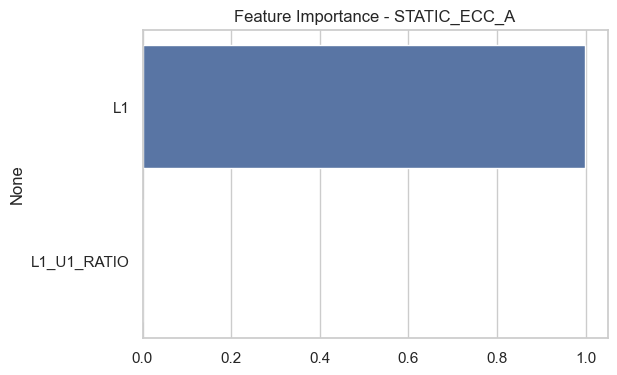

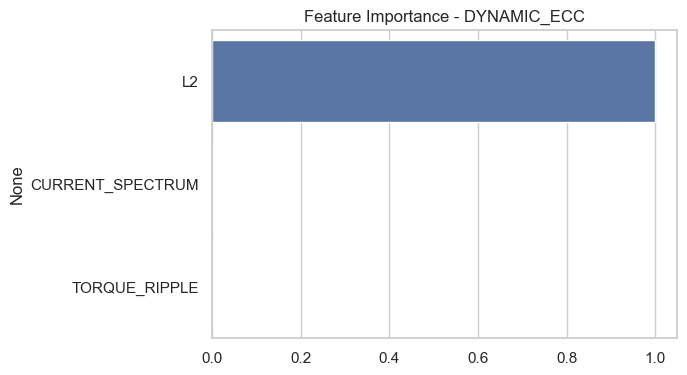

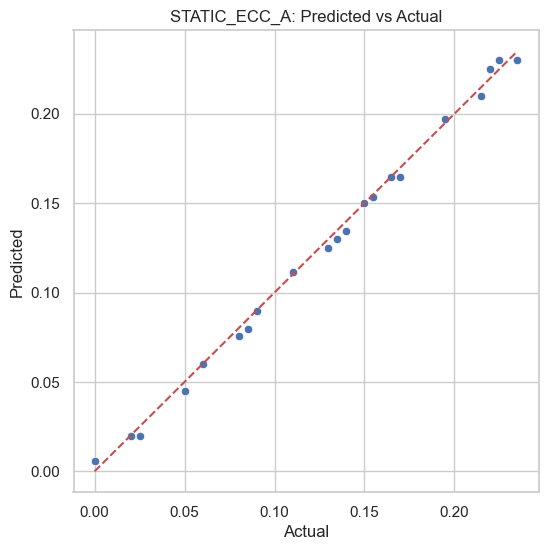

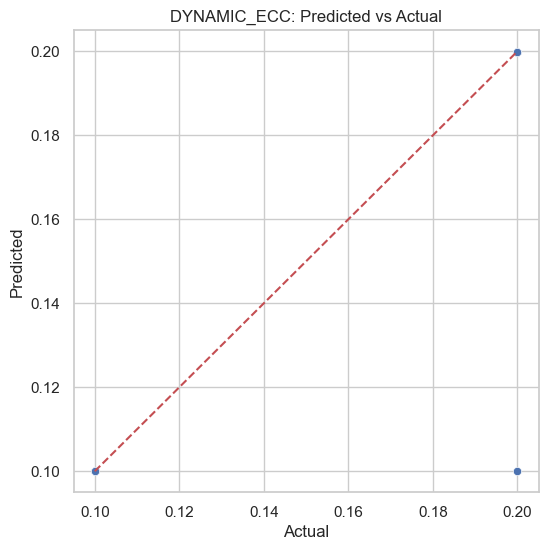

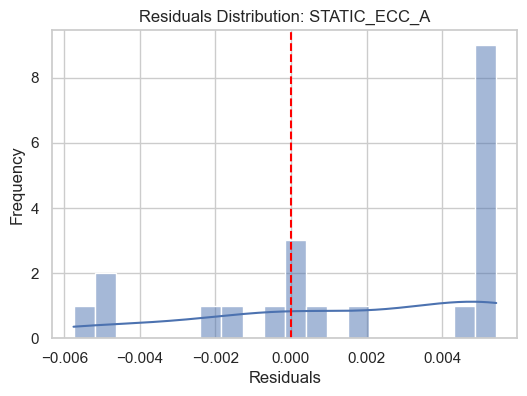

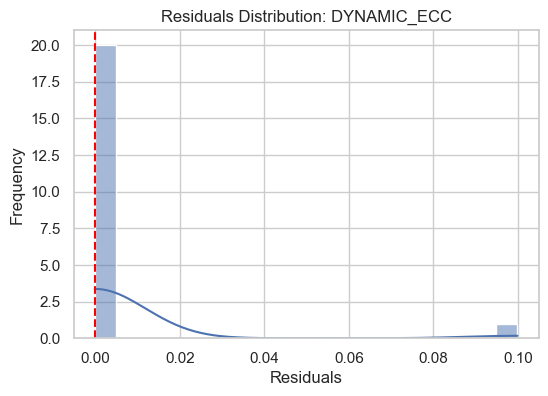

In [ ]:
# 📦 Step 1: Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

tqdm.pandas()
sns.set(style="whitegrid")

# 📥 Step 2: Load Data
print("📥 Loading Data...")
df = pd.read_csv("data_clean.csv")

# 🎯 Step 3: Define Features & Targets
X_static = df[["L1", "L1_U1_RATIO"]]
y_static = df["STATIC_ECC_A"]

X_dynamic = df[["L2", "CURRENT_SPECTRUM", "TORQUE_RIPPLE"]]
y_dynamic = df["DYNAMIC_ECC"]

# ✂️ Step 4: Train-Test Split (80/20)
print("✂️ Splitting data (80/20)...")
X_static_train, X_static_test, y_static_train, y_static_test = train_test_split(X_static, y_static, test_size=0.2, random_state=42)
X_dynamic_train, X_dynamic_test, y_dynamic_train, y_dynamic_test = train_test_split(X_dynamic, y_dynamic, test_size=0.2, random_state=42)

# ⚙️ Step 5: Train Models with Progress
print("⚙️ Training XGBoost Models...")
with tqdm(total=2, desc="Training Models") as pbar:
    model_static = XGBRegressor(random_state=42, verbosity=0)
    model_static.fit(X_static_train, y_static_train)
    pbar.update(1)

    model_dynamic = XGBRegressor(random_state=42, verbosity=0)
    model_dynamic.fit(X_dynamic_train, y_dynamic_train)
    pbar.update(1)

# 💾 Step 6: Save Models
joblib.dump(model_static, "model_static_xgb.pkl")
joblib.dump(model_dynamic, "model_dynamic_xgb.pkl")
print("✅ Models saved as 'model_static_xgb.pkl' and 'model_dynamic_xgb.pkl'")

# 📈 Step 7: Predictions
print("📈 Predicting on Test Set...")
with tqdm(total=2, desc="Predicting") as pbar:
    y_static_pred = model_static.predict(X_static_test)
    pbar.update(1)

    y_dynamic_pred = model_dynamic.predict(X_dynamic_test)
    pbar.update(1)

# 📊 Step 8: Evaluation
print("\n📊 Evaluation Metrics:")
rmse_static = np.sqrt(mean_squared_error(y_static_test, y_static_pred))
r2_static = r2_score(y_static_test, y_static_pred)

rmse_dynamic = np.sqrt(mean_squared_error(y_dynamic_test, y_dynamic_pred))
r2_dynamic = r2_score(y_dynamic_test, y_dynamic_pred)

print(f"🔵 STATIC_ECC_A — RMSE: {rmse_static:.4f}, R²: {r2_static:.4f}")
print(f"🟢 DYNAMIC_ECC — RMSE: {rmse_dynamic:.4f}, R²: {r2_dynamic:.4f}")

# 📉 Step 9: Feature Importances
plt.figure(figsize=(6, 4))
sns.barplot(x=model_static.feature_importances_, y=X_static.columns)
plt.title("Feature Importance - STATIC_ECC_A")
plt.show()

plt.figure(figsize=(6, 4))
sns.barplot(x=model_dynamic.feature_importances_, y=X_dynamic.columns)
plt.title("Feature Importance - DYNAMIC_ECC")
plt.show()

# 📈 Step 10: Plot Predictions vs Actual
def plot_predictions(y_test, y_pred, title):
    plt.figure(figsize=(6, 6))
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(title)
    plt.grid(True)
    plt.show()

plot_predictions(y_static_test, y_static_pred, "STATIC_ECC_A: Predicted vs Actual")
plot_predictions(y_dynamic_test, y_dynamic_pred, "DYNAMIC_ECC: Predicted vs Actual")

# 📉 Step 11: Residuals Plot
def plot_residuals(y_test, y_pred, title):
    residuals = y_test - y_pred
    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, kde=True, bins=20)
    plt.title(f"Residuals Distribution: {title}")
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.axvline(0, color='red', linestyle='--')
    plt.show()

plot_residuals(y_static_test, y_static_pred, "STATIC_ECC_A")
plot_residuals(y_dynamic_test, y_dynamic_pred, "DYNAMIC_ECC")



📋 Sample Predictions vs Actuals:
      L1  L1_U1_RATIO  STATIC_ECC_A  PRED_STATIC_ECC_A  STATIC_ERROR       L2  CURRENT_SPECTRUM  TORQUE_RIPPLE  DYNAMIC_ECC  PRED_DYNAMIC_ECC  DYNAMIC_ERROR
-54.0750       0.9650        0.0125             0.0102        0.0023 -59.4765             4.249           0.48        0.150            0.1001         0.0499
-51.7682       0.9597        0.0165             0.0149        0.0016 -59.4121             4.249           0.49        0.150            0.1001         0.0499
-51.0400       0.9581        0.0180             0.0149        0.0031 -59.3868             4.249           0.49        0.150            0.1001         0.0499
-42.4025       0.9423        0.0500             0.0481        0.0019 -57.9474             4.302           0.64        0.175            0.1001         0.0749
-33.8606       0.9242        0.1350             0.1301        0.0049 -56.9207             4.329           0.83        0.175            0.1999        -0.0249
-29.8350       0.9138   

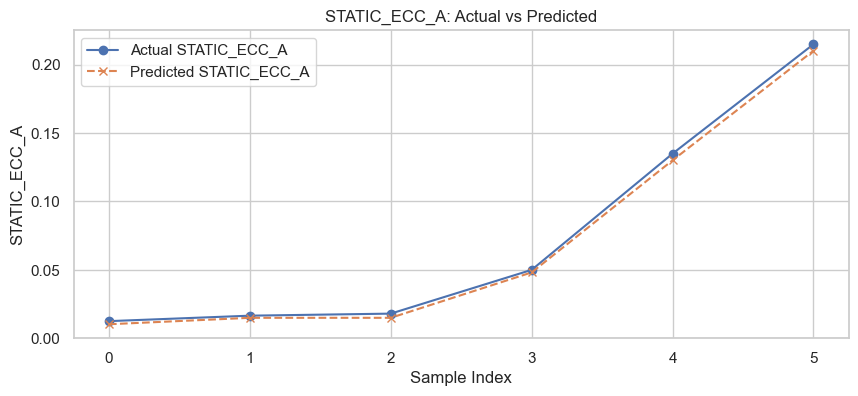

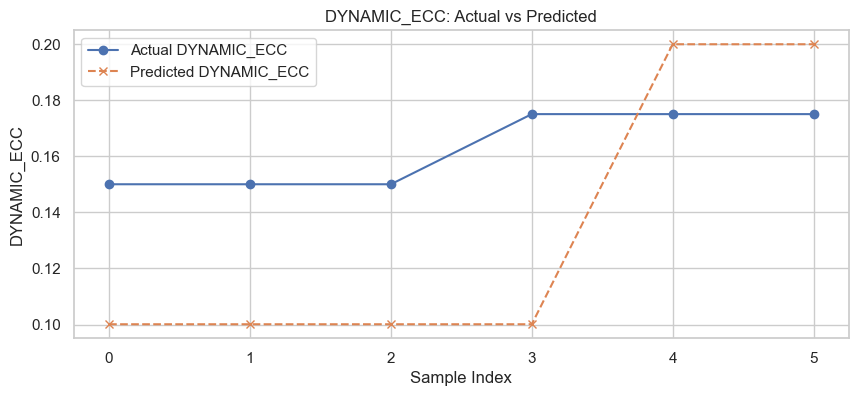

In [7]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt

# 📥 Step 1: Load new data (same format as training)
df_new = pd.read_csv("test_clean.csv")

# 💾 Step 2: Load saved models
model_static = joblib.load("model_static_xgb.pkl")
model_dynamic = joblib.load("model_dynamic_xgb.pkl")

# 🎯 Step 3: Prepare input features
X_static = df_new[["L1", "L1_U1_RATIO"]]
X_dynamic = df_new[["L2", "CURRENT_SPECTRUM", "TORQUE_RIPPLE"]]

# 🔮 Step 4: Make predictions
df_new["PRED_STATIC_ECC_A"] = model_static.predict(X_static)
df_new["PRED_DYNAMIC_ECC"] = model_dynamic.predict(X_dynamic)

# 📊 Step 5: Compare if actual values exist
if "STATIC_ECC_A" in df_new.columns and "DYNAMIC_ECC" in df_new.columns:
    df_new["STATIC_ERROR"] = df_new["STATIC_ECC_A"] - df_new["PRED_STATIC_ECC_A"]
    df_new["DYNAMIC_ERROR"] = df_new["DYNAMIC_ECC"] - df_new["PRED_DYNAMIC_ECC"]

# 🖨️ Step 6: Print predictions in terminal
print("\n📋 Sample Predictions vs Actuals:")
cols_to_print = ["L1", "L1_U1_RATIO", "STATIC_ECC_A", "PRED_STATIC_ECC_A", "STATIC_ERROR",
                 "L2", "CURRENT_SPECTRUM", "TORQUE_RIPPLE", "DYNAMIC_ECC", "PRED_DYNAMIC_ECC", "DYNAMIC_ERROR"]

# Print with rounding for readability
print(df_new[cols_to_print].round(4).head(10).to_string(index=False))

# 📉 Step 7: Visual Comparison - STATIC_ECC_A
plt.figure(figsize=(10, 4))
plt.plot(df_new["STATIC_ECC_A"], label="Actual STATIC_ECC_A", marker="o")
plt.plot(df_new["PRED_STATIC_ECC_A"], label="Predicted STATIC_ECC_A", linestyle="--", marker="x")
plt.title("STATIC_ECC_A: Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("STATIC_ECC_A")
plt.legend()
plt.grid(True)
plt.show()

# 📉 Step 8: Visual Comparison - DYNAMIC_ECC
plt.figure(figsize=(10, 4))
plt.plot(df_new["DYNAMIC_ECC"], label="Actual DYNAMIC_ECC", marker="o")
plt.plot(df_new["PRED_DYNAMIC_ECC"], label="Predicted DYNAMIC_ECC", linestyle="--", marker="x")
plt.title("DYNAMIC_ECC: Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("DYNAMIC_ECC")
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# 📦 Step 1: Imports
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tqdm.notebook import tqdm
import joblib

# 📥 Step 2: Load Data
df = pd.read_csv("data_clean_with_xy_engineered.csv")

# 🎯 Step 3: Define Input Features and Target (Y)
features = ["U2", "U1", "L1", "Power_like", "U_diff"]
X = df[features]
y = df["Y"]

# ✂️ Step 4: Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ⚙️ Step 5: Train Model with Progress
print("⚙️ Training XGBoost Regressor to predict Y...")
with tqdm(total=1, desc="Training Model") as pbar:
    model_y = XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
    model_y.fit(X_train, y_train)
    pbar.update(1)

# 📈 Step 6: Evaluate
y_pred = model_y.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\n📊 Evaluation:")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# 💾 Step 7: Save the Model
joblib.dump(model_y, "model_y.pkl")
print("✅ Model saved as 'model_y.pkl'")


⚙️ Training XGBoost Regressor to predict Y...


Training Model:   0%|          | 0/1 [00:00<?, ?it/s]


📊 Evaluation:
RMSE: 0.0218
R² Score: 0.8095
✅ Model saved as 'model_y.pkl'



📋 Sample Predictions vs Actuals:
      L1  L1_U1_RATIO  STATIC_ECC_A  PRED_STATIC_ECC_A  STATIC_ERROR       U1       U2    PRED_Y  DYNAMIC_ECC  PRED_DYNAMIC_ECC  DYNAMIC_ERROR
-54.0750       0.9650        0.0125             0.0102        0.0023 -56.0376 -37.5219 47.599899        0.150            0.1001         0.0499
-51.7682       0.9597        0.0165             0.0149        0.0016 -53.9447 -37.5205 47.599899        0.150            0.1001         0.0499
-51.0400       0.9581        0.0180             0.0149        0.0031 -53.2732 -37.5200 47.599899        0.150            0.1001         0.0499
-42.4025       0.9423        0.0500             0.0481        0.0019 -44.9981 -36.2963 47.599899        0.175            0.1001         0.0749
-33.8606       0.9242        0.1350             0.1301        0.0049 -36.6363 -36.2702 47.599899        0.175            0.1001         0.0749
-29.8350       0.9138        0.2150             0.2103        0.0047 -32.6511 -36.2444 47.599899        0.17

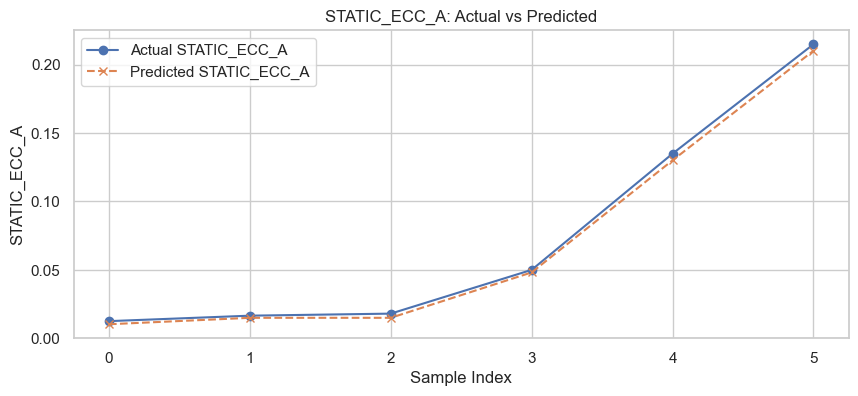

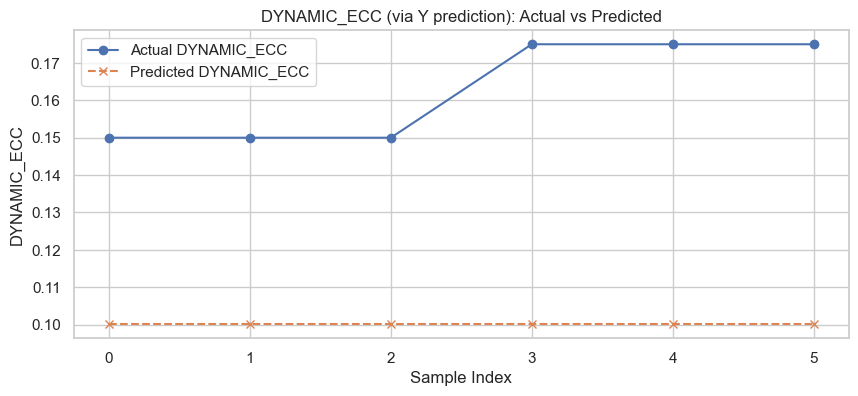

In [10]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt

# 📥 Step 1: Load test data (same format with all engineered features)
df_new = pd.read_csv("test_clean.csv")

# 💾 Step 2: Load saved models
model_static = joblib.load("model_static_xgb.pkl")
model_y = joblib.load("model_y.pkl")  # new model that predicts Y

# 🎯 Step 3: Prepare input features
X_static = df_new[["L1", "L1_U1_RATIO"]]
X_y = df_new[["U2", "U1", "L1", "Power_like", "U_diff"]]  # features used to train model_y

# 🔮 Step 4: Make predictions
df_new["PRED_STATIC_ECC_A"] = model_static.predict(X_static)
df_new["PRED_Y"] = model_y.predict(X_y)
df_new["PRED_DYNAMIC_ECC"] = 47.7 - df_new["PRED_Y"]

# 📊 Step 5: Compare if actual values exist
if "STATIC_ECC_A" in df_new.columns and "DYNAMIC_ECC" in df_new.columns:
    df_new["STATIC_ERROR"] = df_new["STATIC_ECC_A"] - df_new["PRED_STATIC_ECC_A"]
    df_new["DYNAMIC_ERROR"] = df_new["DYNAMIC_ECC"] - df_new["PRED_DYNAMIC_ECC"]

# 🖨️ Step 6: Print predictions in terminal
print("\n📋 Sample Predictions vs Actuals:")
cols_to_print = [
    "L1", "L1_U1_RATIO", "STATIC_ECC_A", "PRED_STATIC_ECC_A", "STATIC_ERROR",
    "U1", "U2", "PRED_Y",
    "DYNAMIC_ECC", "PRED_DYNAMIC_ECC", "DYNAMIC_ERROR"
]
print(df_new[cols_to_print].round(4).head(10).to_string(index=False))

# 📉 Step 7: Visual Comparison - STATIC_ECC_A
plt.figure(figsize=(10, 4))
plt.plot(df_new["STATIC_ECC_A"], label="Actual STATIC_ECC_A", marker="o")
plt.plot(df_new["PRED_STATIC_ECC_A"], label="Predicted STATIC_ECC_A", linestyle="--", marker="x")
plt.title("STATIC_ECC_A: Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("STATIC_ECC_A")
plt.legend()
plt.grid(True)
plt.show()

# 📉 Step 8: Visual Comparison - DYNAMIC_ECC
plt.figure(figsize=(10, 4))
plt.plot(df_new["DYNAMIC_ECC"], label="Actual DYNAMIC_ECC", marker="o")
plt.plot(df_new["PRED_DYNAMIC_ECC"], label="Predicted DYNAMIC_ECC", linestyle="--", marker="x")
plt.title("DYNAMIC_ECC (via Y prediction): Actual vs Predicted")
plt.xlabel("Sample Index")
plt.ylabel("DYNAMIC_ECC")
plt.legend()
plt.grid(True)
plt.show()
